<h1>Implement a linear regression model to predict the prices of houses based on their square footage and number of bedrooms and bathrooms<h1>

mean squared error:  1341724513.067105
mean absolute error:  26578.84270431445
R squared score: 0.75374958251358
root mean squared error:  36629.557915256155


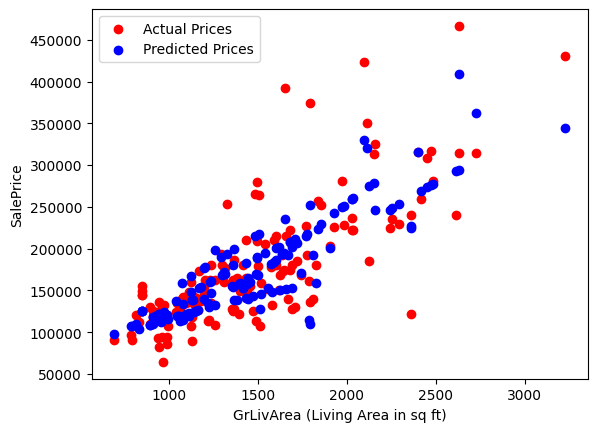

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')

df.dropna(subset=['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice'], inplace=True)

df = df[(df['GrLivArea'] < 4000) & (df['SalePrice'] < 500000)]

df['TotalBathrooms'] = df['FullBath'] + 0.5 * df['HalfBath']

features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'TotalBathrooms']
target = 'SalePrice'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=102)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

model = LinearRegression()

model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

print("mean squared error: ",mean_squared_error(y_test,y_pred))
print("mean absolute error: ",mean_absolute_error(y_test,y_pred))
print("R squared score:", r2_score(y_test,y_pred))
print("root mean squared error: ",np.sqrt(mean_squared_error(y_test,y_pred)))

plt.scatter(X_test['GrLivArea'], y_test, color='red', label='Actual Prices')
plt.scatter(X_test['GrLivArea'], y_pred, color='blue', label='Predicted Prices')
plt.xlabel('GrLivArea (Living Area in sq ft)')
plt.ylabel('SalePrice')
plt.legend()
plt.show()

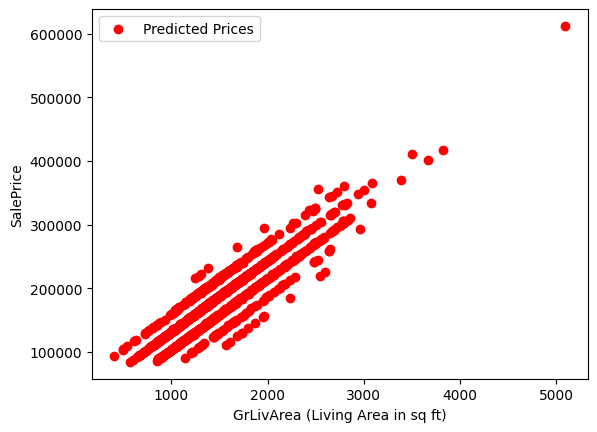

In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

train_df = pd.read_csv('train.csv')

test_df = pd.read_csv('test.csv')

features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
target = 'SalePrice'

X_train = train_df[features]
y_train = train_df[target]

X_test = test_df[features]

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.scatter(X_test['GrLivArea'], y_pred, color='red', label='Predicted Prices')
plt.xlabel('GrLivArea (Living Area in sq ft)')
plt.ylabel('SalePrice')
plt.legend()
plt.show()